In [1]:
#importando as lib do pybrain
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised import BackpropTrainer

In [3]:
#importando sklearn
from sklearn import datasets

In [4]:
#carregando o dataset iris
iris = datasets.load_iris()

In [7]:
#pegando as entradas X e as saidas Y
x, y = iris.data,  iris.target
print(x)
print(y)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [9]:
from pybrain.datasets.classification import ClassificationDataSet

In [10]:
dt = ClassificationDataSet(4, 1, nb_classes=3)

In [11]:
#adicionando as amostras
for i in range(len(x)):
    dt.addSample(x[i], y[i])

In [13]:
#particionando os dataset para treino e testes
#teste: objetivo DE AVALIAR O DESEMPENHO DO CLASSIFICADOR
#treino: objetivo DE AJUSTAR OS PESOS DO CLASSIFICADOR
train_data, part_data = dt.splitWithProportion(0.6) #60% do dataset serão para treino e 40% para teste
print(len(train_data))
print(len(part_data))

90
60


In [14]:
#dividindo os dados entre teste e validação
#conjunto de teste: objetivo DE AJUSTAR OS PARAMETROS DO CLASSIFICADOR
#conjunto de validação: objetivo DE TESTE O "VÍCIO DA REDE NEURAL". O rede costumar decorar padrões
test_data, val_data = part_data.splitWithProportion(0.5) #50% dos dados para teste e 50% para validação

In [16]:
#construindo a rede neural
rede = buildNetwork(dt.indim,3, dt.outdim)
trainer = BackpropTrainer(rede, dataset=train_data, learningrate=0.01, momentum=0.1, verbose=True)

In [17]:
#treinando até convertir e obter a lista de erros de treino e erros de validação
train_error, val_error = trainer.trainUntilConvergence(dataset=train_data, maxEpochs=100)

Total error:  0.391085633386
Total error:  0.28442351527
Total error:  0.245474742177
Total error:  0.216404145328
Total error:  0.191906083596
Total error:  0.169198018659
Total error:  0.149173553835
Total error:  0.131247340362
Total error:  0.11588311004
Total error:  0.102536258138
Total error:  0.0906961067669
Total error:  0.0820408724251
Total error:  0.0735820377787
Total error:  0.0672329468326
Total error:  0.0615123031561
Total error:  0.0562236132326
Total error:  0.0527915613438
Total error:  0.0490226603148
Total error:  0.0458798860811
Total error:  0.0428980010865
Total error:  0.0399278766379
Total error:  0.0385901628656
Total error:  0.0370591164542
Total error:  0.034977764606
Total error:  0.0339495234413
Total error:  0.032575011443
Total error:  0.031185779277
Total error:  0.0305643931357
Total error:  0.0291753128841
Total error:  0.0282209293612
Total error:  0.0278610527143
Total error:  0.0271535277187
Total error:  0.0257355092612
Total error:  0.025246666

In [19]:
#importando a matplotlib para plotar gráficos
import matplotlib.pyplot as plt

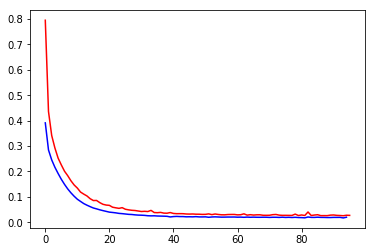

In [20]:
#plotando os erros
plt.plot(train_error, 'b', val_error, 'r')
plt.show()

In [21]:
#outra maneira de treinar a rede neural
trainer.trainOnDataset(train_data, 500) #500 épocas

Total error:  0.0209223591255
Total error:  0.020204215297
Total error:  0.0215656373473
Total error:  0.0210758029428
Total error:  0.0214408743076
Total error:  0.0200102898236
Total error:  0.0213306816208
Total error:  0.0208636438761
Total error:  0.0212751432377
Total error:  0.0210123132376
Total error:  0.0201081856385
Total error:  0.0205437117346
Total error:  0.0207376592882
Total error:  0.0201336783671
Total error:  0.0175132243782
Total error:  0.0212992989467
Total error:  0.0196048442628
Total error:  0.0212245909073
Total error:  0.0189970107976
Total error:  0.0210683588011
Total error:  0.0204661688592
Total error:  0.0199462049349
Total error:  0.0207270986383
Total error:  0.0200870820011
Total error:  0.0197121840907
Total error:  0.0200077621288
Total error:  0.0204730245205
Total error:  0.0199676283069
Total error:  0.0206713879692
Total error:  0.0209412865352
Total error:  0.0198099859835
Total error:  0.0175577309355
Total error:  0.0193921591664
Total error

Total error:  0.0159635995873
Total error:  0.016978402941
Total error:  0.0171191494405
Total error:  0.0165452553973
Total error:  0.0162896009643
Total error:  0.0166140613044
Total error:  0.0161457622037
Total error:  0.0165580964366
Total error:  0.0166786953775
Total error:  0.0169598770679
Total error:  0.0171042757368
Total error:  0.0167867104919
Total error:  0.0169011064006
Total error:  0.0165060631594
Total error:  0.0159833652169
Total error:  0.0175245089061
Total error:  0.0173874575131
Total error:  0.0171782724483
Total error:  0.0172579159803
Total error:  0.0162587908696
Total error:  0.0165860790311
Total error:  0.0173455839321
Total error:  0.016966411875
Total error:  0.016322215928
Total error:  0.0169965098575
Total error:  0.0173139188813
Total error:  0.0172697127433
Total error:  0.0161559905684
Total error:  0.0135714427506
Total error:  0.0168966321322
Total error:  0.0155690740885
Total error:  0.0167656923637
Total error:  0.0160031403561
Total error: 

In [25]:
#testando a rede
saidas = rede.activateOnDataset(test_data)
for i in range(len(saidas)):
    print('saida: %d correta: %f' % (saidas[i], test_data['target'][i]))

saida: 0 correta: 1.000000
saida: 0 correta: 0.000000
saida: 1 correta: 1.000000
saida: 1 correta: 2.000000
saida: 1 correta: 1.000000
saida: 2 correta: 2.000000
saida: 0 correta: 0.000000
saida: 0 correta: 0.000000
saida: 1 correta: 1.000000
saida: 1 correta: 2.000000
saida: 0 correta: 0.000000
saida: 0 correta: 0.000000
saida: 0 correta: 0.000000
saida: 0 correta: 0.000000
saida: 0 correta: 0.000000
saida: 0 correta: 0.000000
saida: 1 correta: 1.000000
saida: 0 correta: 0.000000
saida: 0 correta: 1.000000
saida: 1 correta: 1.000000
saida: 1 correta: 2.000000
saida: 0 correta: 0.000000
saida: 0 correta: 1.000000
saida: 1 correta: 1.000000
saida: 0 correta: 0.000000
saida: 1 correta: 1.000000
saida: 1 correta: 1.000000
saida: 0 correta: 1.000000
saida: 1 correta: 1.000000
saida: 2 correta: 2.000000


In [27]:
print(type(dt))
print(type(train_data))

<class 'pybrain.datasets.classification.ClassificationDataSet'>
<class 'pybrain.datasets.supervised.SupervisedDataSet'>
